# Postdam PM2.5 Baseline (Naive Approach) Forcasting

Between 2013 and 2023, data collected by DEBB021 was used. 

To increase the accuracy of PM2.5 data estimation, NO2, O3, SO2, PM10 pollutant gas data accepted by the EEA was added.


In [ ]:
# imports
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))
import matplotlib.pyplot as plt
import numpy as np, pandas as pd
import model_base as mb

## Data Exploration

* Load Data


In [2]:
df_hourly_ts, df_daily_ts, df_weekly_ts, df_monthly_ts = mb.read_timestamp_freq()


# HOURLY 
mb.set_start_time_index(df_hourly_ts)


# DAILY 
mb.set_start_time_index(df_daily_ts)


# WEEKLY 
mb.set_start_time_index(df_weekly_ts)


# MONTHLY 
mb.set_start_time_index(df_monthly_ts)

In [3]:
# Naive Forecast

# Hourly
df_hourly_ts['Forcasted-PM2.5-Value'] = df_hourly_ts['PM2.5-Value'].shift(1)

# daily
df_daily_ts['Forcasted-PM2.5-Value'] = df_daily_ts['PM2.5-Value'].shift(1)

# weekly
df_weekly_ts['Forcasted-PM2.5-Value'] = df_weekly_ts['PM2.5-Value'].shift(1)

# monthly
df_monthly_ts['Forcasted-PM2.5-Value'] = df_monthly_ts['PM2.5-Value'].shift(1)


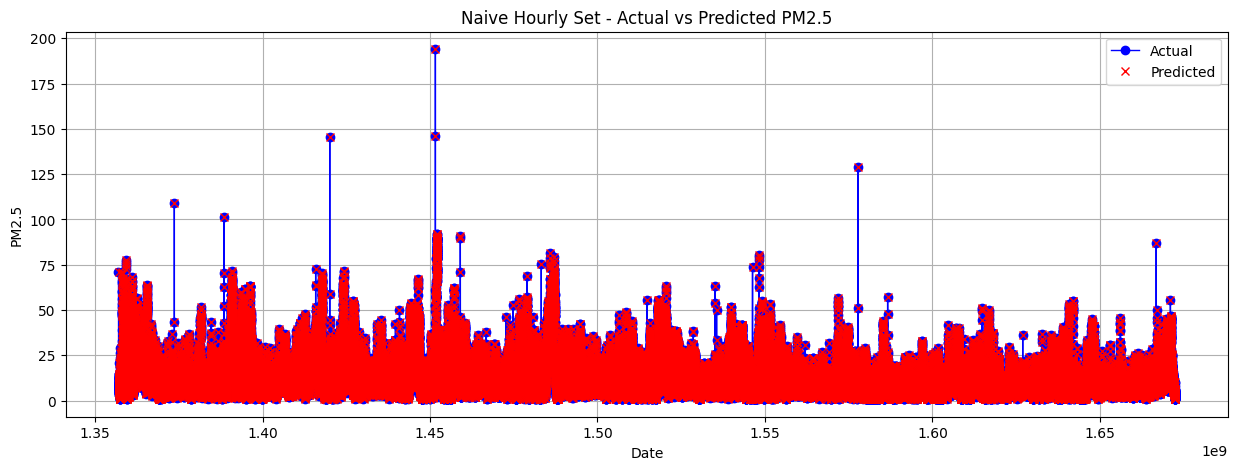

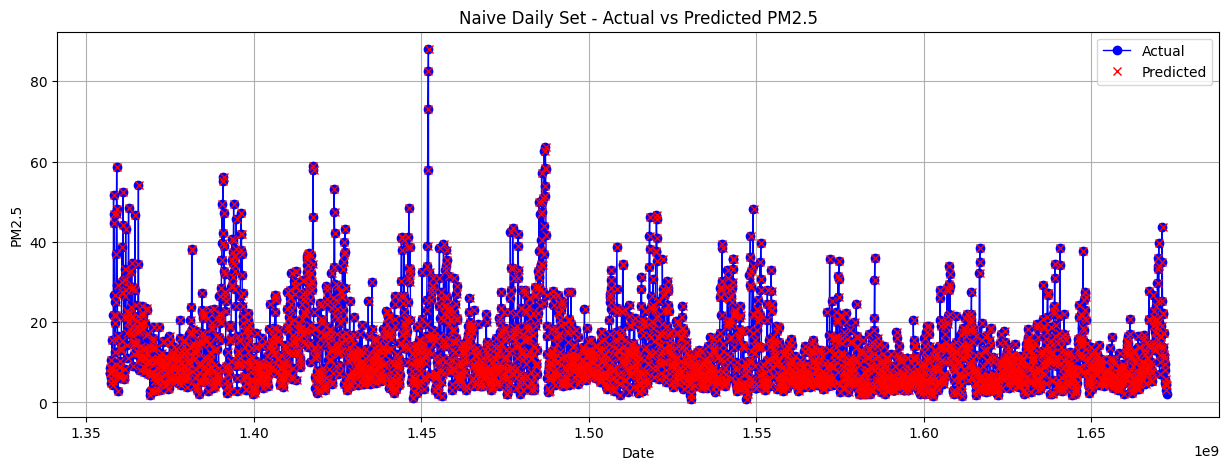

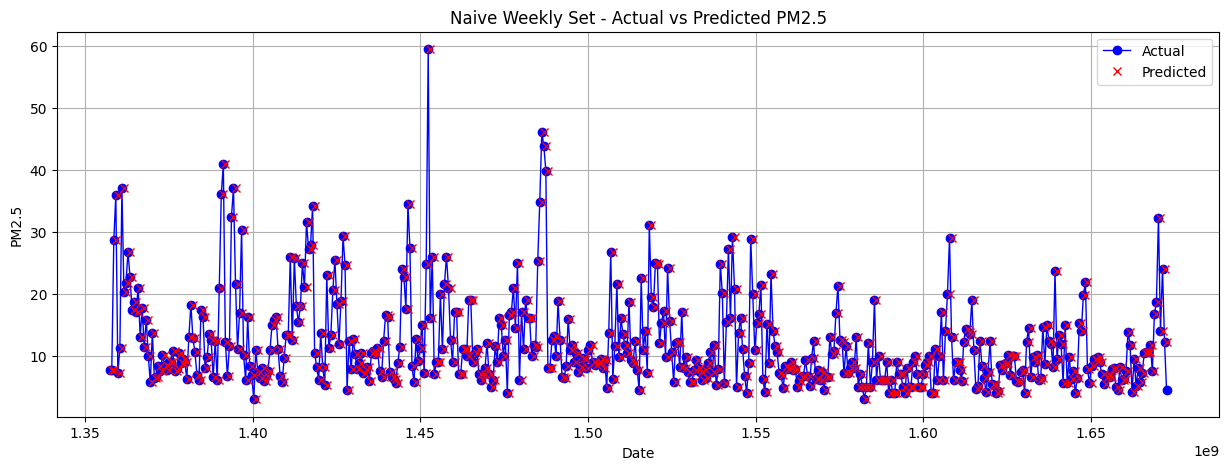

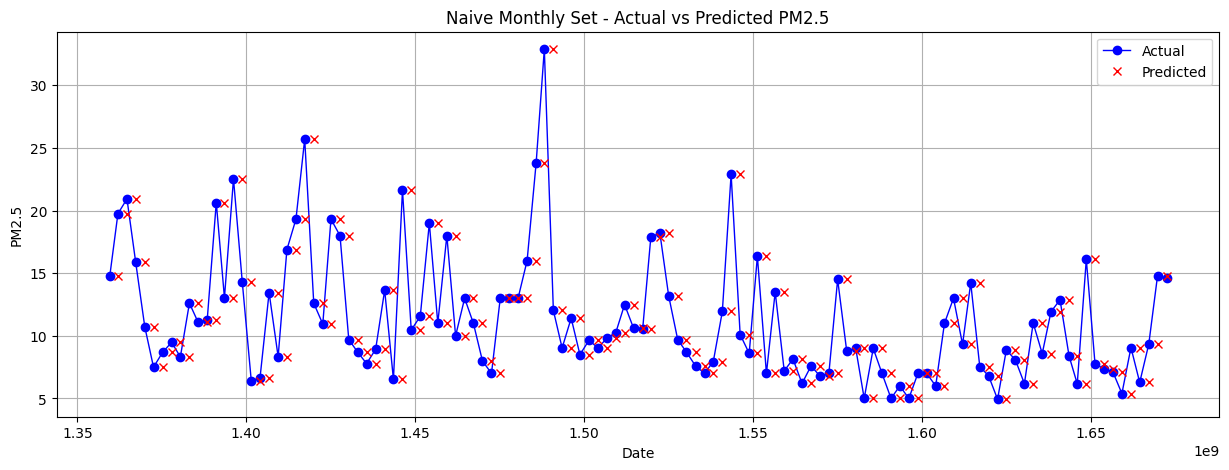

In [4]:

# Hourly
mb.plot_pm_true_predict(df_hourly_ts, df_hourly_ts['Forcasted-PM2.5-Value'], 'Naive Hourly')

# daily
mb.plot_pm_true_predict(df_daily_ts, df_daily_ts['Forcasted-PM2.5-Value'], 'Naive Daily')

# weekly
mb.plot_pm_true_predict(df_weekly_ts, df_weekly_ts['Forcasted-PM2.5-Value'], 'Naive Weekly')

# monthly
mb.plot_pm_true_predict(df_monthly_ts, df_monthly_ts['Forcasted-PM2.5-Value'], 'Naive Monthly')

## Error Metrics

* Mean Absolute Error (MAE): MAE measures the average absolute difference between the predicted values and the actual values. Lower MAE values indicate better accuracy.

* Mean Squared Error (MSE): MSE measures the average squared difference between predicted and actual values. It penalizes larger errors more heavily than MAE. Lower MSE values indicate better accuracy.

* Root Mean Squared Error (RMSE): RMSE is the square root of the MSE. It provides an interpretable measure in the same units as the original data. Lower RMSE values indicate better accuracy.

* Mean Absolute Percentage Error (MAPE): MAPE calculates the average percentage difference between predicted and actual values. It is expressed as a percentage. Lower MAPE values indicate better accuracy. However, be cautious with MAPE when dealing with small or zero actual values, as it can result in division by zero.

* Mean Absolute Scaled Error (MASE): MASE measures the relative accuracy of a forecasting model compared to a naive forecast (e.g., using the previous period's value). A MASE value of less than 1 suggests that the model is better than the naive forecast.


In [5]:
# hourly
# drop first column
df_hourly_ts = df_hourly_ts.dropna()

# Define your features and target variable
train_data, validation_data, test_data = mb.split_data(df_hourly_ts)

# Error Metric
mb.evolve_error_metrics(validation_data['PM2.5-Value'],validation_data['Forcasted-PM2.5-Value'])
mb.naive_mean_absolute_scaled_error(validation_data['PM2.5-Value'],validation_data['Forcasted-PM2.5-Value'])
# Test Error Metric
mb.evolve_error_metrics(test_data['PM2.5-Value'],test_data['Forcasted-PM2.5-Value'])
mb.naive_mean_absolute_scaled_error(test_data['PM2.5-Value'],test_data['Forcasted-PM2.5-Value'])

Training set size: 52588
Validation set size: 17529
Test set size: 17530
MAE: 1.0364
MSE: 3.8618
RMSE: 1.9652
MAPE: 0.1295
Bias: 0.0003
MASE: 1.0000750665971256
MAE: 1.0801
MSE: 3.5469
RMSE: 1.8833
MAPE: 0.1287
Bias: -0.0001
MASE: 0.9999429549343981


0.9999429549343981

In [6]:
# daily
# drop first column
df_daily_ts = df_daily_ts.dropna()

# Define your features and target variable
train_data, validation_data, test_data = mb.split_data(df_daily_ts)

# Error Metric
mb.evolve_error_metrics(validation_data['PM2.5-Value'],validation_data['Forcasted-PM2.5-Value'])
mb.naive_mean_absolute_scaled_error(validation_data['PM2.5-Value'],validation_data['Forcasted-PM2.5-Value'])
# Test Error Metric
mb.evolve_error_metrics(test_data['PM2.5-Value'],test_data['Forcasted-PM2.5-Value'])
mb.naive_mean_absolute_scaled_error(test_data['PM2.5-Value'],test_data['Forcasted-PM2.5-Value'])

Training set size: 2190
Validation set size: 730
Test set size: 731
MAE: 3.6055
MSE: 28.1077
RMSE: 5.3017
MAPE: 0.4748
Bias: 0.0075
MASE: 1.001140611580754
MAE: 3.5018
MSE: 26.5837
RMSE: 5.1559
MAPE: 0.4262
Bias: 0.0082
MASE: 0.9986320109439127


0.9986320109439127

In [7]:
# weekly
# drop first column
df_weekly_ts = df_weekly_ts.dropna()


# Define your features and target variable
train_data, validation_data, test_data = mb.split_data(df_weekly_ts)

# Error Metric
mb.evolve_error_metrics(validation_data['PM2.5-Value'],validation_data['Forcasted-PM2.5-Value'])
mb.naive_mean_absolute_scaled_error(validation_data['PM2.5-Value'],validation_data['Forcasted-PM2.5-Value'])
# Test Error Metric
mb.evolve_error_metrics(test_data['PM2.5-Value'],test_data['Forcasted-PM2.5-Value'])
mb.naive_mean_absolute_scaled_error(test_data['PM2.5-Value'],test_data['Forcasted-PM2.5-Value'])

Training set size: 312
Validation set size: 104
Test set size: 105
MAE: 3.9934
MSE: 30.7129
RMSE: 5.5419
MAPE: 0.4586
Bias: 0.0486
MASE: 1.0007458796689703
MAE: 3.7511
MSE: 28.2061
RMSE: 5.3109
MAPE: 0.4218
Bias: 0.0149
MASE: 0.9980783014788372


0.9980783014788372

In [8]:
# monthly
# drop first column
df_monthly_ts = df_monthly_ts.dropna()

# Define your features and target variable
train_data, validation_data, test_data = mb.split_data(df_monthly_ts)

# Error Metric
mb.evolve_error_metrics(validation_data['PM2.5-Value'],validation_data['Forcasted-PM2.5-Value'])
mb.naive_mean_absolute_scaled_error(validation_data['PM2.5-Value'],validation_data['Forcasted-PM2.5-Value'])
# Test Error Metric
mb.evolve_error_metrics(test_data['PM2.5-Value'],test_data['Forcasted-PM2.5-Value'])
mb.naive_mean_absolute_scaled_error(test_data['PM2.5-Value'],test_data['Forcasted-PM2.5-Value'])

Training set size: 71
Validation set size: 23
Test set size: 25
MAE: 3.1348
MSE: 17.3826
RMSE: 4.1692
MAPE: 0.3693
Bias: -0.0391
MASE: 0.9768444389703166
MAE: 3.2233
MSE: 16.3558
RMSE: 4.0442
MAPE: 0.3500
Bias: -0.1438
MASE: 0.9844327013077067


0.9844327013077067